In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
year_start = 1998
year_end = 2018
years_iter = range(year_start,year_end)

# Read cleaned data

- ## MSA data

In [14]:
df = {}
for year in years_iter:
    df[year] = pd.read_csv('data/cleaned/msa_naicssector_cleanedv2_totEmploy_'+str(year)+'.csv')
    
# used later to rank the MSA's by employment
df_2017 = df[2017].copy()

- ## State-country data

In [5]:
df_state = {}
for year in years_iter:
    df_state[year] = pd.read_csv('data/cleaned/state_naicssector_cleanedv2_totEmploy_'+str(year)+'.csv')

# Merge data

- ## MSA

In [6]:
for year in years_iter:
    df[year] = df[year].set_index(['MSA','NAICS Code'],drop=True)
    
tot_empl_all = df[year_start]
for year in range(year_start+1,year_end):
    tot_empl_all = pd.merge(tot_empl_all, df[year],how='inner' ,on=['MSA','NAICS Code'],copy=False )
    #df_all.to_csv('data/draft/df_all_merge_'+str(year)+'.csv')
    
tot_empl_all = tot_empl_all.T
tot_empl_all.index = list(years_iter)

- ## state-country

In [7]:
for year in years_iter:
    df_state[year] = df_state[year].set_index(['State','NAICS Code'],drop=True)

tot_empl_state_all = df_state[year_start]
for year in range(year_start+1,year_end):
    tot_empl_state_all = pd.merge(tot_empl_state_all, df_state[year],how='inner' ,on=['State','NAICS Code'],copy=False )
    
tot_empl_state_all = tot_empl_state_all.T
tot_empl_state_all.index = list(years_iter)

# Calculate PPC: point percent change

- ## MSA

In [8]:
tot_empl_ppc = tot_empl_all.diff().dropna()/tot_empl_all.shift().dropna()*100

- ## State-Country

In [9]:
tot_empl_state_ppc = tot_empl_state_all.diff().dropna()/tot_empl_state_all.shift().dropna()*100

# Utilities

- ## MSA to State 

In [10]:
MSA_df = pd.read_csv('data/MSA_wikipedia.csv',delimiter='\t')

MSAs = MSA_df['Metropolitan statistical area ']
MSA_shorts = MSAs.map(lambda x: x.split(',')[0].split('-')[0].lower() )
MSA_shorts_dict = {MSA_shorts.iloc[i]:
                   {'MSA': MSAs.iloc[i][:-1],
                    'State': MSAs.iloc[i].split(', ')[1].split(' ')[0] } for i in range(len(MSAs))  }


state_abbr_df = pd.read_csv('data/state_abbr.csv',delimiter='\t',names=['State','Abbr.'])
state_to_abbr_dict = { state_abbr_df['State'].iloc[i].title()[0:-1] :state_abbr_df['Abbr.'].iloc[i] for i in range(len(state_abbr_df)) }
state_to_abbr_dict['United States'] = 'US'

abbr_to_state_dict ={ v:k for k,v in state_to_abbr_dict.items()}

MSA_to_state_dict = { MSAs.iloc[i][:-1]: MSAs.iloc[i].split(', ')[1].split(' ')[0]  for i in range(len(MSAs))  }

- ## Compare MSA data to state and country data

In [11]:
def ppc_relative( MSA,NAICS_code ):
    return (tot_empl_ppc[ (MSA,NAICS_code) ]-tot_empl_state_ppc[ ( abbr_to_state_dict[MSA_to_state_dict[MSA]] ,NAICS_code) ],
            tot_empl_ppc[ (MSA,NAICS_code) ]-tot_empl_state_ppc[ ( 'United States' ,NAICS_code) ] )

- ## NAICS Codes

In [79]:
NAICS_df = pd.read_csv('data/NAICS_codes.csv',delimiter='    ')
NAICS_dict = { NAICS_df['NAICS Code'].iloc[i]:NAICS_df['Description'].iloc[i] for i in NAICS_df.index }
NAICS_dict['--'] = 'Total'
NAICS_dict

<ipython-input-79-48819ea87482>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  NAICS_df = pd.read_csv('data/NAICS_codes.csv',delimiter='    ')


{'11': 'Agriculture, Forestry, Fishing and Hunting',
 '21': 'Mining, Quarrying, and Oil and Gas Extraction',
 '22': 'Utilities',
 '23': 'Construction',
 '31-33': 'Manufacturing',
 '42': 'Wholesale Trade',
 '44-45': 'Retail Trade',
 '48-49': 'Transportation and Warehousing',
 '51': 'Information',
 '52': 'Finance and Insurance',
 '53': 'Real Estate and Rental and Leasing',
 '54': 'Professional, Scientific, and Technical Services',
 '55': 'Management of Companies and Enterprises',
 '56': 'Administrative and Support and Waste Management and Remediation Services',
 '61': 'Educational Services',
 '62': 'Health Care and Social Assistance',
 '71': 'Arts, Entertainment, and Recreation',
 '72': 'Accommodation and Food Services',
 '81': 'Other Services (except Public Administration)',
 '92': 'Public Administration',
 '99': 'Unclassified',
 '--': 'Total'}

- ## MSA rank by total Employment

In [15]:
msa_emp_rank_df =  df_2017[ df_2017['NAICS Code']=='--' ].sort_values(by='Total Employment - 2017',ascending=False).reset_index(drop=True)
del msa_emp_rank_df['NAICS Code'], msa_emp_rank_df['Total Employment - 2017']
msa_emp_rank_df_dict = {i:msa_emp_rank_df['MSA'].iloc[i] for i in range(len(msa_emp_rank_df))  }

- ## Print Info

# Plots

- ## PPC for an MSA and naics

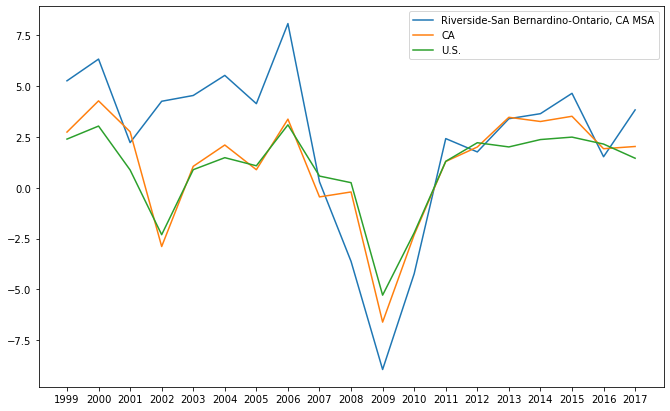

In [16]:
#MSA = 'Los Angeles-Long Beach-Anaheim, CA MSA'
MSA = 'Riverside-San Bernardino-Ontario, CA MSA'
#MSA = 'San Diego-Chula Vista-Carlsbad, CA MSA'
#MSA = 'Oxnard-Thousand Oaks-Ventura, CA MSA'
#MSA = 'Santa Maria-Santa Barbara, CA MSA'

#MSA = 'Denver-Aurora-Lakewood, CO MSA'
NAICS_code = '--'

plt.figure()

fsize = 7
plt.gcf().set_size_inches(fsize*1.6,fsize)

tot_empl_ppc[ (MSA,NAICS_code) ].plot(label=MSA)
tot_empl_state_ppc[ ( abbr_to_state_dict[MSA_to_state_dict[MSA]] ,NAICS_code) ].plot(label=MSA_to_state_dict[MSA])
tot_empl_state_ppc[ ( 'United States' ,NAICS_code) ].plot(label='U.S.')

ax = plt.gca()
ax.set_yticks( [0], minor=True )
ax.yaxis.grid(True, which='minor')

plt.legend()
plt.xticks(list(range(year_start+1,year_end) ));
#plt.grid(True)

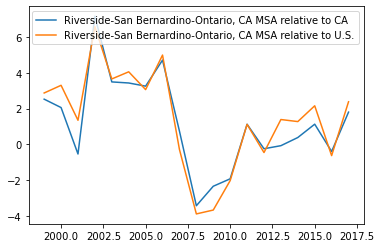

In [17]:
ppc_relative_state, ppc_relative_country =  ppc_relative(MSA,NAICS_code)
ppc_relative_state.plot(label=MSA+' relative to '+MSA_to_state_dict[MSA])
ppc_relative_country.plot(label=MSA+' relative to U.S.')
plt.legend()

# Correlation with house data
- ## Read, clean and Calculate PPC

In [185]:
house_df = pd.read_csv('data/other-data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
del house_df['RegionID'], house_df['SizeRank'], house_df['RegionType'], house_df['StateName']
house_df.set_index('RegionName',drop=True,inplace=True)
house_df = house_df.T
house_df.index = pd.to_datetime(house_df.index)

house_df = house_df.rolling(12,center=True).mean()

house_df['Year'] = house_df.index.year
house_df = house_df.groupby(house_df['Year']).mean()
house_df = house_df.loc[ list( range(year_start,2020) ) ]

# calculate PPC
house_ppc_df = house_df.diff()/house_df.shift()*100
house_ppc_df = house_ppc_df.drop( house_ppc_df.index[0] )

- ## Some more utilities

In [19]:
def house_ppc_relative(MSA_rank):
    return house_ppc_df[house_ppc_df.columns[MSA_rank]]-house_ppc_df[house_ppc_df.columns[0]]

In [37]:
houseRank_to_empRank = {1:None, 2:0, 3:1, 4:2, 5:4, 6:5, 7:3, 8:8, 9:7,
                        10:6, 11:9, 12:None, 13:17, 14:12, 15:11, 16:10, 17:14, 18:15, 19:18 ,
                        20:16, 21:13, 22:19, 23:None, 24:22, 25:31, 26:26, 27:20, 28:24, 29:None, 30:23 }

In [63]:
def available_industries(MSA):
    code_list = list(tot_empl_all[MSA].columns)
    return pd.Series( [ NAICS_dict[ key ] for key in code_list ] , index=code_list )

def print_info(house_rank):
    print( "MSA: ", house_ppc_df.columns[ house_rank ] )
    if houseRank_to_empRank[house_rank] != None: 
        print( "Available Industires:\n", available_industries( msa_emp_rank_df_dict[ houseRank_to_empRank[house_rank] ] ) )
    else:
        print("Employment data no available at the moment")

- ## Compare PPC

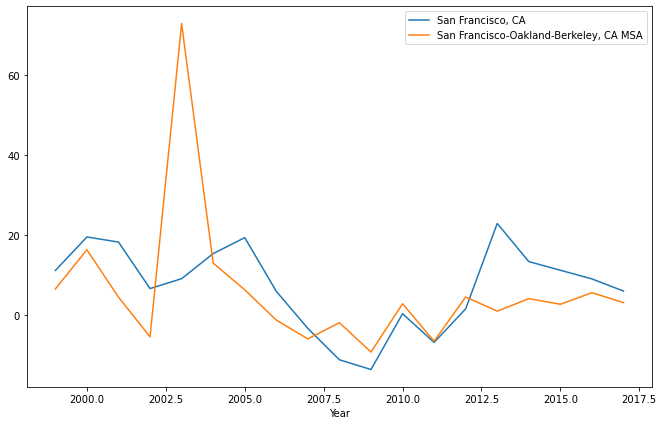

In [21]:
plt.figure()

fsize = 7
plt.gcf().set_size_inches(fsize*1.6,fsize)


MSA_rank = 11
house_ppc_df[house_ppc_df.columns[MSA_rank]].plot( label= house_ppc_df.columns[MSA_rank])


MSA_rank = houseRank_to_empRank[MSA_rank]
MSA = msa_emp_rank_df_dict[MSA_rank]
NAICS_code = '54'

tot_empl_ppc[ (MSA,NAICS_code) ].plot(label=MSA)

plt.legend()
#plt.ylim( (-10,10) )

- ## Compare Relative PPC

In [80]:
MSA_rank = 2
print_info(MSA_rank)

MSA:  Los Angeles-Long Beach-Anaheim, CA
Available Industires:
 --                                                   Total
11              Agriculture, Forestry, Fishing and Hunting
21           Mining, Quarrying, and Oil and Gas Extraction
22                                               Utilities
23                                            Construction
31-33                                        Manufacturing
42                                         Wholesale Trade
44-45                                         Retail Trade
48-49                       Transportation and Warehousing
51                                             Information
52                                   Finance and Insurance
53                      Real Estate and Rental and Leasing
54        Professional, Scientific, and Technical Services
55                 Management of Companies and Enterprises
56       Administrative and Support and Waste Managemen...
61                                    Educational S

Text(0, 0.5, 'Relative Percent Point Difference')

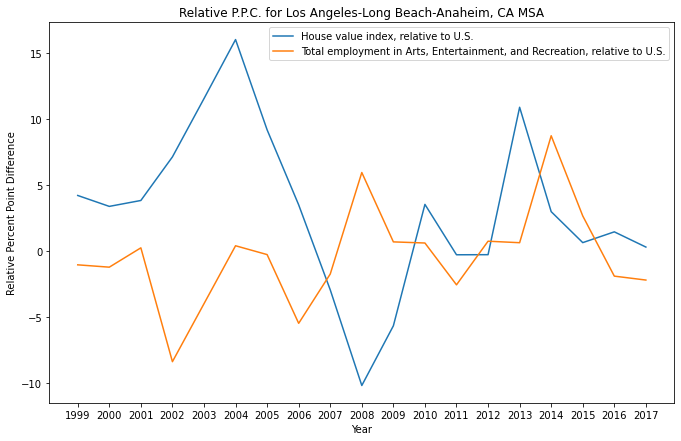

In [92]:
plt.figure()

fsize = 7
plt.gcf().set_size_inches(fsize*1.6,fsize)


#MSA_rank = 6
house_ppc_relative(MSA_rank).plot( label= 'House value index, relative to U.S.' ) #house_ppc_df.columns[MSA_rank]


MSA_emp_rank = houseRank_to_empRank[MSA_rank]
MSA = msa_emp_rank_df_dict[MSA_emp_rank]
NAICS_code = '71'
ppc_relative_state, ppc_relative_country =  ppc_relative(MSA,NAICS_code)
#ppc_relative_state.plot(label=MSA+' relative to '+MSA_to_state_dict[MSA])
#ppc_relative_country.drop
ppc_relative_country.drop([2003]).plot(label="Total employment in "+NAICS_dict[NAICS_code]+ ', relative to U.S.' )

plt.legend()
#plt.ylim( (-10,10) )

plt.legend()
plt.xticks(list(range(year_start+1,year_end) ));
plt.title( "Relative P.P.C. for "+MSA )
plt.xlabel("Year")
plt.ylabel("Relative Percent Point Difference")

## Correlation with poverty and income data

- ## Read and calculate PPC

In [176]:
poverty_df = pd.read_csv( 'data/saipe/poverty_percent_county_years_.csv',header=[0,1] ,index_col=0)
income_df = pd.read_csv('data/saipe/income_county_years_.csv',header=[0,1],index_col=0)

In [177]:
poverty_df.dropna(axis=1,inplace=True)
poverty_df = poverty_df.rolling(3,center=True).mean().dropna()
poverty_ppc_df = poverty_df.diff()/poverty_df.shift()*100
poverty_ppc_df = poverty_ppc_df.drop( poverty_ppc_df.index[0] )

income_df.dropna(axis=1,inplace=True)
income_df = income_df.rolling(3,center=True).mean().dropna()
income_ppc_df = income_df.diff()/income_df.shift()*100
income_ppc_df = income_ppc_df.drop( income_ppc_df.index[0] )

In [167]:
def relative_ppc_poverty(MSA_rank):
    return -poverty_ppc_df[ houseRank_to_county[MSA_rank] ] + poverty_ppc_df['US','United States']

def relative_ppc_income(MSA_rank):
    return income_ppc_df[ houseRank_to_county[MSA_rank] ] - income_ppc_df['US','United States']

- ## Plots

In [260]:
MSA_rank = 8
print_info(MSA_rank)

MSA:  Miami-Fort Lauderdale, FL
Available Industires:
 --                                                   Total
23                                            Construction
31-33                                        Manufacturing
42                                         Wholesale Trade
44-45                                         Retail Trade
48-49                       Transportation and Warehousing
51                                             Information
52                                   Finance and Insurance
53                      Real Estate and Rental and Leasing
54        Professional, Scientific, and Technical Services
55                 Management of Companies and Enterprises
56       Administrative and Support and Waste Managemen...
61                                    Educational Services
62                       Health Care and Social Assistance
71                     Arts, Entertainment, and Recreation
72                         Accommodation and Food Services
8

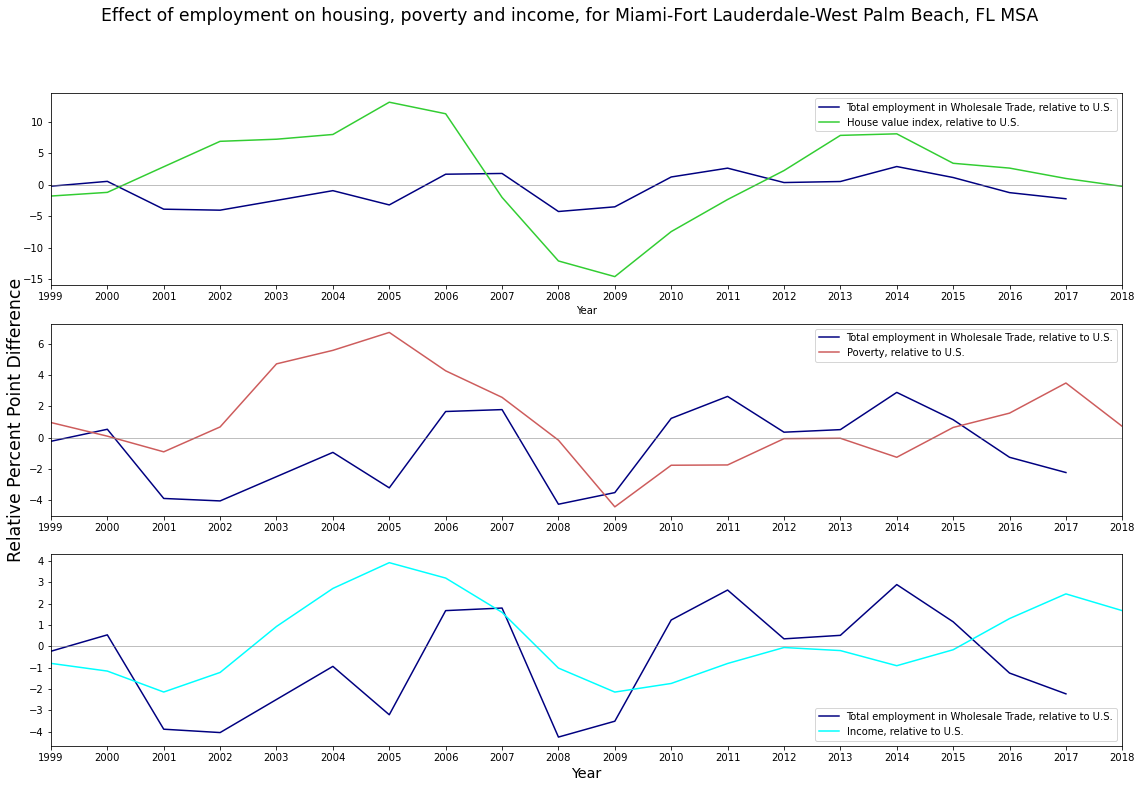

In [268]:
MSA = msa_emp_rank_df_dict[ houseRank_to_empRank[MSA_rank] ]
NAICS_code = '42'
ppc_relative_state, ppc_relative_country =  ppc_relative(MSA,NAICS_code)

fig = plt.figure()
fsize = 12
plt.gcf().set_size_inches(fsize*1.6,fsize)
year_min = 1999
year_max = 2018

#plt.subplots(31)
#fig.suptitle( "Relative Point Percent Difference for "+MSA ,fontsize='xx-large' )
fig.suptitle( "Effect of employment on housing, poverty and income, for "+MSA ,fontsize='xx-large' )

plt.subplot(311)
ppc_relative_country.drop([2003]).plot(label="Total employment in "+NAICS_dict[NAICS_code]+ ', relative to U.S.' ,c='navy')
house_ppc_relative(MSA_rank).plot( label= 'House value index, relative to U.S.' ,color='limegreen') #house_ppc_df.columns[MSA_rank]
plt.plot( [year_min,year_max],[0,0],color='grey',lw=0.5 )
plt.xlim( [year_min,year_max] )
plt.xticks( list(range(year_min,year_max+1) ));
plt.legend()
#plt.title( "Relative P.P.C. for "+MSA )

plt.subplot(312)
ppc_relative_country.drop([2003]).plot(label="Total employment in "+NAICS_dict[NAICS_code]+ ', relative to U.S.',c='navy' )
relative_ppc_poverty(MSA_rank).plot(label='Poverty'+ ', relative to U.S.',color='indianred')
plt.plot( [year_min,year_max],[0,0],color='grey',lw=0.5 )
plt.xlim( [year_min,year_max] )
plt.xticks( list(range(year_min,year_max+1) ));
plt.legend()
plt.ylabel("Relative Percent Point Difference",fontsize='xx-large')

plt.subplot(313)
ppc_relative_country.drop([2003]).plot(label="Total employment in "+NAICS_dict[NAICS_code]+ ', relative to U.S.' ,c='navy')
relative_ppc_income(MSA_rank).plot(label='Income'+ ', relative to U.S.',color='cyan' )
plt.plot( [year_min,year_max],[0,0],color='grey',lw=0.5 )
plt.xlim( [year_min,year_max] )
#plt.ylim( (-10,10) )
plt.xticks( list(range(year_min,year_max+1) ));
plt.legend()

plt.xlabel("Year",fontsize='x-large')

#plt.ylabel("Relative Percent Point Difference")
plt.savefig('data/empl_wholes_HPI_miami.png')

# Draft

In [124]:
#tot_empl_state_all['Wyoming']
#tot_empl_state_all['California']
#tot_empl_state_all['Alabama']
#tot_empl_state_all

In [123]:
#tot_empl_all[MSA]

In [125]:
#msa_emp_rank_df.iloc[:35]

In [126]:
houseRank_to_empRank = {1:'NaN', 2:0, 3:1, 4:2, 5:4, 6:5, 7:3, 8:8, 9:7,
                        10:6, 11:9, 12:'NaN', 13:17, 14:12, 15:11, 16:10, 17:14, 18:15, 19:18 ,
                        20:16, 21:13, 22:19, 23:'NaN', 24:22, 25:31, 26:26, 27:20, 28:24, 29:'NaN', 30:23 }
pd.DataFrame(house_ppc_df.columns[:35])

,RegionName
0,United States
1,"New York, NY"
2,"Los Angeles-Long Beach-Anaheim, CA"
3,"Chicago, IL"
4,"Dallas-Fort Worth, TX"
5,"Philadelphia, PA"
6,"Houston, TX"
7,"Washington, DC"
8,"Miami-Fort Lauderdale, FL"
9,"Atlanta, GA"


In [263]:
#house_ppc_df
houseRank_to_county = {1:('US','United States'), 2:('CA','Los Angeles County'), 3:('IL','Cook County'), 4:('TX','Dallas County'), 5:('PA',''), 
                       6:('TX','Harris County'), 7:('DC','District of Columbia'), 8:('FL','Miami-Dade County'), 9:('GA','Fulton County'), 10:('MA','Suffolk County'), 
                       11:('CA','San Francisco County'), 12:('MI','Wayne County'), 13:('CA','Riverside County'), 14:('AZ','Maricopa County'), 15:('WA','King County'), 
                       16:('',''), 17:('CA','San Diego County'), 18:('',''), 19:('','') ,  20:16, 
                       21:13, 22:19, 23:'NaN', 24:22, 25:('CA','Sacramento County')
                        }

In [262]:
poverty_ppc_df['FL'].columns[:]

Index(['Florida', 'Alachua County', 'Baker County', 'Bay County',
       'Bradford County', 'Brevard County', 'Broward County', 'Calhoun County',
       'Charlotte County', 'Citrus County', 'Clay County', 'Collier County',
       'Columbia County', 'DeSoto County', 'Dixie County', 'Duval County',
       'Escambia County', 'Flagler County', 'Franklin County',
       'Gadsden County', 'Gilchrist County', 'Glades County', 'Gulf County',
       'Hamilton County', 'Hardee County', 'Hendry County', 'Hernando County',
       'Highlands County', 'Hillsborough County', 'Holmes County',
       'Indian River County', 'Jackson County', 'Jefferson County',
       'Lafayette County', 'Lake County', 'Lee County', 'Leon County',
       'Levy County', 'Liberty County', 'Madison County', 'Manatee County',
       'Marion County', 'Martin County', 'Miami-Dade County', 'Monroe County',
       'Nassau County', 'Okaloosa County', 'Okeechobee County',
       'Orange County', 'Osceola County', 'Palm Beach Coun

In [175]:
#poverty_df['US'].rolling(3,center=True).mean().dropna()
poverty_df

Postal Code            US      AL                                \
Name        United States Alabama Autauga County Baldwin County   
1997                 13.3    16.2           11.8           11.1   
1998                 12.7    15.7           11.3           11.0   
1999                 11.9    15.3           11.4           10.5   
2000                 11.3    14.6           10.5            9.7   
2001                 11.7    15.7           10.8           11.1   
2002                 12.1    15.4           10.3           10.7   
2003                 12.5    15.3           10.4           10.1   
2004                 12.7    16.1           11.6           10.0   
2005                 13.3    16.9           10.4           11.4   
2006                 13.3    16.6           12.5           11.0   
2007                 13.0    16.6           10.4           10.3   
2008                 13.2    15.9           10.7            9.9   
2009                 14.3    17.5           11.2           13.3   
2010                 15.3    18.9           11.9           13.3   
2011                 15.9    19.1           14.9           13.4   
2012                 15.9    19.0           12.7           13.9   
2013                 15.8    18.9           13.5           14.2   
2014                 15.5    19.2           13.1           13.0   
2015                 14.7    18.5           12.7           12.9   
2016                 14.0    17.2           13.5           11.7   
2017                 13.4    16.9           13.4           10.1   
2018                 13.1    16.8           13.8            9.8   
2019                 12.3    15.6           12.1           10.1   

Postal Code                                                          \
Name        Barbour County Bibb County Blount County Bullock County   
1997                  23.8        17.4          13.3           29.2   
1998                  22.7        16.9          12.9           28.0   
1999                  22.3        17.1          12.3           26.6   
2000                  22.2        17.8          12.0           28.6   
2001                  24.2        18.2          13.6           32.9   
2002                  23.6        17.7          12.6           31.4   
2003                  22.2        16.8          11.9           26.5   
2004                  23.9        17.1          12.4           30.3   
2005                  22.4        16.6          11.4           38.2   
2006                  28.7        18.8          12.8           32.9   
2007                  26.1        18.2          13.1           34.0   
2008                  24.5        18.5          13.1           33.6   
2009                  32.8        18.1          14.6           34.7   
2010                  25.3        20.9          16.5           31.1   
2011                  29.5        22.2          14.9           32.8   
2012                  29.0        21.5          16.2           32.3   
2013                  28.2        23.1          17.2           35.2   
2014                  25.4        18.1          17.5           35.1   
2015                  32.0        22.2          14.7           39.6   
2016                  29.9        20.1          14.1           32.6   
2017                  33.4        20.2          12.8           34.4   
2018                  30.9        21.8          13.2           42.5   
2019                  27.1        20.3          16.3           30.0   

Postal Code                               ...              WY              \
Name        Butler County Calhoun County  ... Niobrara County Park County   
1997                 23.4           16.2  ...            17.8        12.7   
1998                 23.4           16.1  ...            17.3        12.2   
1999                 21.9           16.3  ...            16.0        12.1   
2000                 20.7           15.1  ...            14.7        11.1   
2001                 21.6           16.3  ...            14.6        11.4   
2002     